In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
import os
from google.colab import files
%matplotlib inline

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
df=pd.read_csv("economic_index.csv")

In [6]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [7]:
df.columns

Index(['Unnamed: 0', 'year', 'month', 'interest_rate', 'unemployment_rate',
       'index_price'],
      dtype='object')

In [8]:
df.drop(["Unnamed: 0","year","month"],axis=1,inplace=True)

In [9]:
df.columns

Index(['interest_rate', 'unemployment_rate', 'index_price'], dtype='object')

In [36]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [12]:
df.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


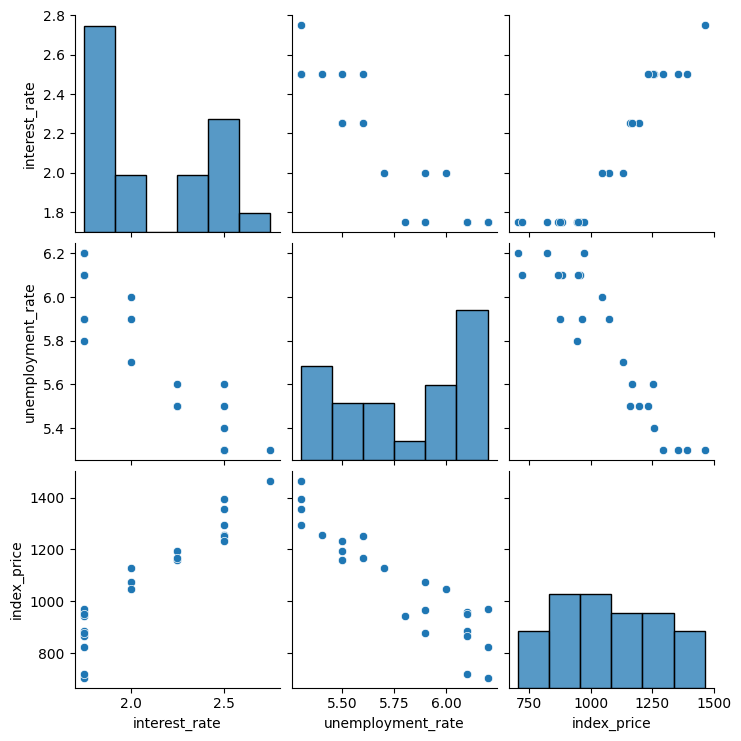

In [14]:
snb.pairplot(df)
plt.show()

In [35]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


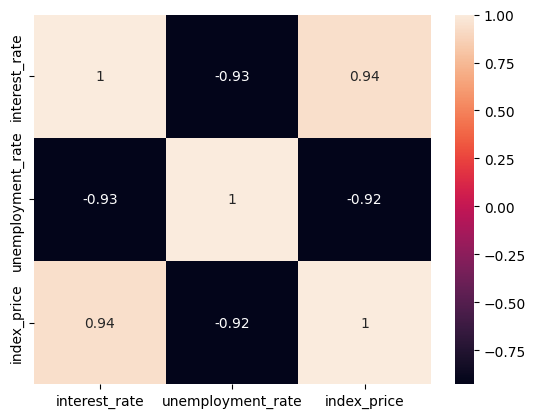

In [16]:
snb.heatmap(df.corr(),annot=True)
plt.show()

[]

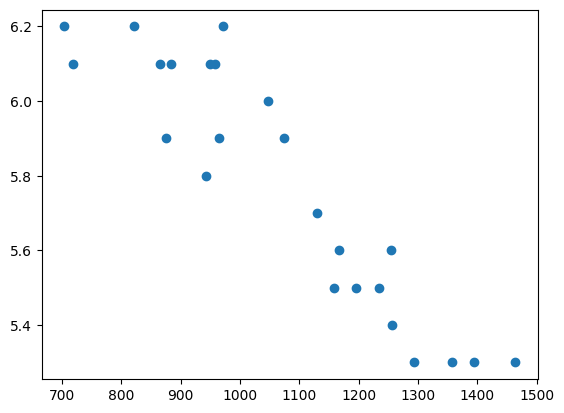

In [17]:
plt.scatter(x=df["index_price"],y=df["unemployment_rate"])
plt.plot()

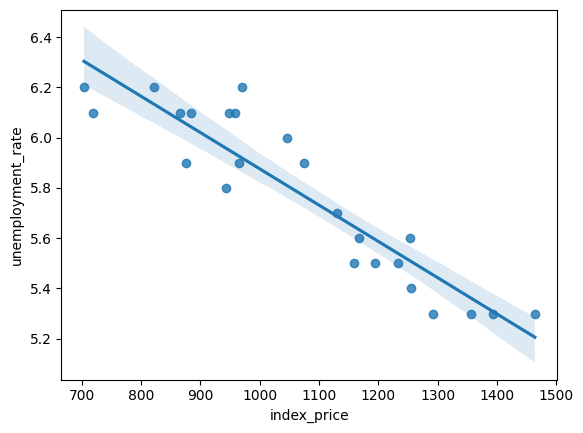

In [38]:
snb.regplot(x=df["index_price"],y=df["unemployment_rate"])
plt.show()

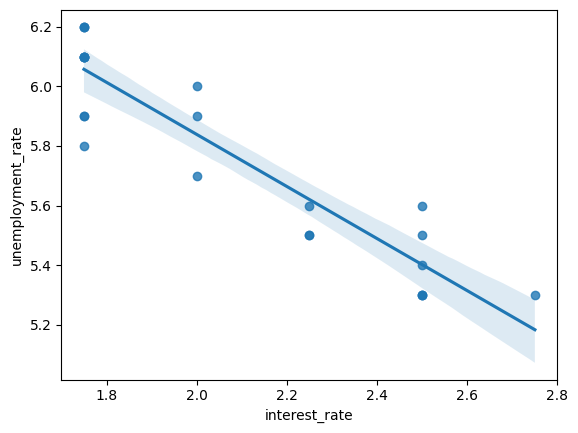

In [39]:
snb.regplot(x=df["interest_rate"],y=df["unemployment_rate"])
plt.show()

In [18]:
df.columns

Index(['interest_rate', 'unemployment_rate', 'index_price'], dtype='object')

In [19]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [20]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [21]:
y.head()

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256


In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [26]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(24, 2)
(19, 2)
(5, 2)


In [27]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)

In [28]:
x_test=scaler.transform(x_test)

In [31]:
print(type(x_train))
print(type(x_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [32]:
model=LinearRegression()

In [33]:
model.fit(x_train,y_train)

LinearRegression()

In [40]:
y_pred=model.predict(x_test)

In [128]:
model.coef_

array([109.92457331, -86.21587218])

In [131]:
model.intercept_

np.float64(1081.3684210526317)

In [41]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
rmse=np.sqrt(mse)

In [42]:
print(r2)

0.843674381305876


In [48]:
cross_val=cross_val_score(model,x_train,y_train,scoring="neg_mean_squared_error",cv=3)

In [49]:
cross_val

array([-4725.86091342, -7704.29345936, -1515.60065282])

In [55]:
cross_valid=cross_validate(model,x_train,y_train,cv=5)

In [56]:
print(cross_valid.keys())

dict_keys(['fit_time', 'score_time', 'test_score'])


In [59]:
print(cross_valid["fit_time"])

[0.00224543 0.00178003 0.00228834 0.00157785 0.00173259]


In [60]:
print(cross_valid["score_time"])

[0.00123596 0.00117707 0.00114107 0.00114703 0.00119972]


In [61]:
print(cross_valid["test_score"])

[ 0.75153191  0.97700294  0.71237761  0.82238415 -1.75002026]


In [65]:
y_pred1=cross_val_predict(model,x_train,y_train,cv=5)

In [66]:
y_pred1.shape

(19,)

In [67]:
y_train.shape

(19,)

In [68]:
x_train.shape

(19, 2)

In [79]:
x_feature1=x_train[:,:-1]

In [80]:
y_feature=y_train

In [84]:
y_feature=np.array(y_feature).reshape((19,1))

In [85]:
y_feature.shape

(19, 1)

In [89]:
y_pred_feature=np.array(y_pred1).reshape((19,1))

In [90]:
y_pred_feature.shape

(19, 1)

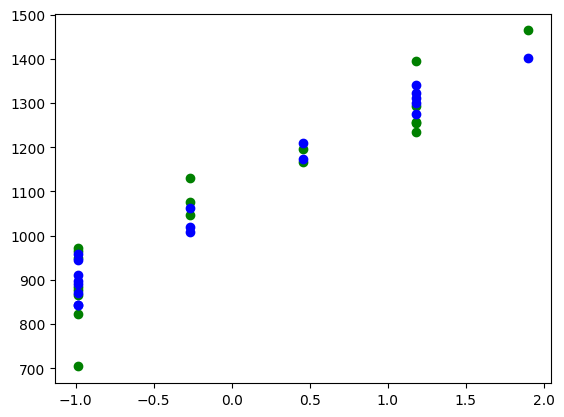

In [94]:
plt.scatter(x=x_feature1,y=y_feature,color="green")
plt.scatter(x_feature1,y_pred_feature,color="blue")
plt.show()

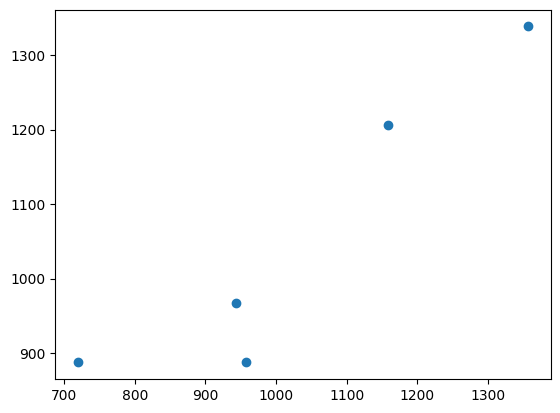

In [98]:
plt.scatter(y_test,y_pred)
plt.show()

In [99]:
residuals=y_test-y_pred

In [100]:
residuals

,index_price
15,70.773070
2,18.549765
14,-24.115844
23,-168.226930
8,-46.795559


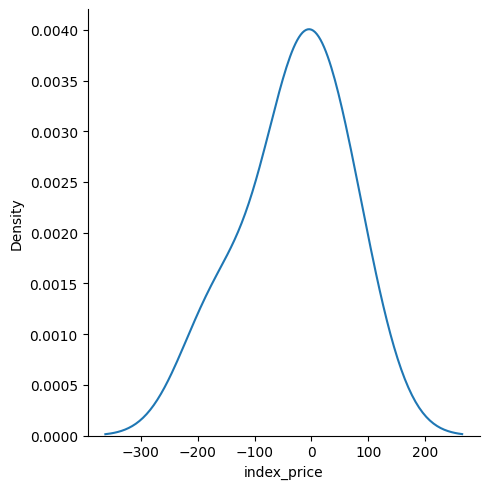

In [102]:
snb.displot(residuals,kind="kde")

In [106]:
from statsmodels.api import OLS

In [119]:
print(x_train.shape)
print(y_train.shape)

(19, 2)
(19,)


In [120]:
model1=OLS(y_train,x_train)

In [121]:
result=model1.fit()

In [122]:
result.params

,0
x1,109.924573
x2,-86.215872


In [123]:
result.tvalues

,0
x1,0.149769
x2,-0.117467


In [124]:
print(result.t_test([1, 0]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0           109.9246    733.959      0.150      0.883   -1438.594    1658.443


In [132]:
result.summary()

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=19 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.031
Model:                            OLS   Adj. R-squared (uncentered):             -0.083
Method:                 Least Squares   F-statistic:                             0.2697
Date:                Fri, 27 Jun 2025   Prob (F-statistic):                       0.767
Time:                        15:08:33   Log-Likelihood:                         -159.72
No. Observations:                  19   AIC:                                      323.4
Df Residuals:                      17   BIC:                                      325.3
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           109.9246    733.959      0.150      0.883   -1438.594    1658.443
x2           -86.2159    733.959     -0.117      0.908   -1634.734    1462.303
==============================================================================
Omnibus:                        2.196   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.334   Jarque-Bera (JB):                0.945
Skew:                          -0.523   Prob(JB):                        0.624
Kurtosis:                       3.315   Cond. No.                         5.40
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""